In [2]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K

In [3]:


(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

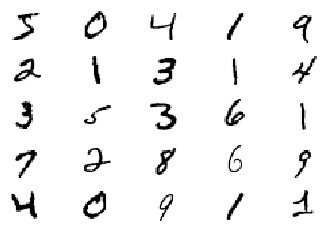

In [4]:


for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [6]:
xtrain.shape

(60000, 28, 28)

In [7]:
# alternative way of flattening
# from tensorflow.keras.utils import to_categorical


# xtrain.reshape(60000, 28*28)
# ytrain = to_categorical(ytrain, num_classes=10)

In [8]:
# normalizing
xtrain = xtrain / 255

In [9]:
K.clear_session()

m = Sequential([  # a list of layers
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
])

In [10]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs=30
m.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = m.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 2s 6ms/step - loss: 0.4013 - accuracy: 0.8905 - val_loss: 0.2144 - val_accuracy: 0.9408
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.1903 - accuracy: 0.9466 - val_loss: 0.1627 - val_accuracy: 0.9551
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.1396 - accuracy: 0.9604 - val_loss: 0.1359 - val_accuracy: 0.9609
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.1106 - accuracy: 0.9682 - val_loss: 0.1162 - val_accuracy: 0.9661
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0898 - accuracy: 0.9743 - val_loss: 0.1118 - val_accuracy: 0.9671
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0743 - accuracy: 0.9790 - val_loss: 0.1005 - val_accuracy: 0.9689
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0634 - accuracy: 0.9824 - val_loss: 0.0957 - val_accuracy: 0.9704
Epoch 

In [12]:
m.evaluate(xtest, ytest, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 20.7230 - accuracy: 0.9777


[20.722970962524414, 0.9776999950408936]

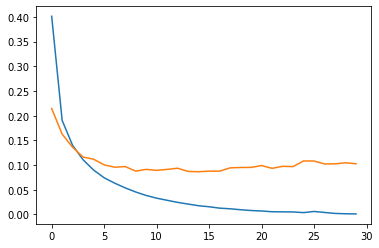

In [13]:
# inspect the history object
plt.plot(range(epochs), hist.history['loss'])
plt.plot(range(epochs), hist.history['val_loss'])

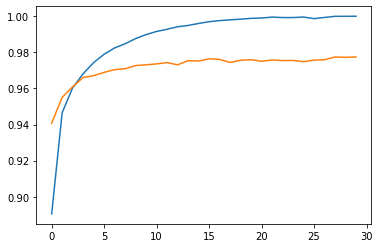

In [14]:
plt.plot(range(epochs), hist.history['accuracy'])
plt.plot(range(epochs), hist.history['val_accuracy'])

In [15]:
# save a list of np.arrays with the weights
w = m.get_weights()

In [17]:
w[0].shape

(784, 128)

In [18]:
w[0][1][0]

0.047071032

/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


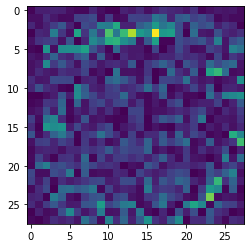

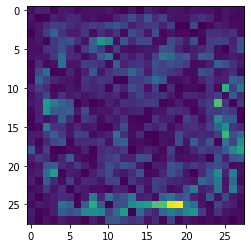

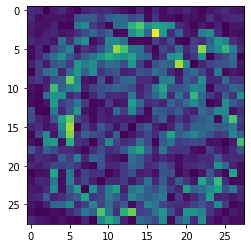

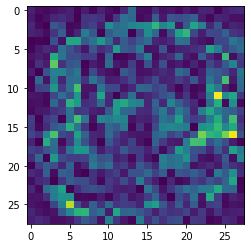

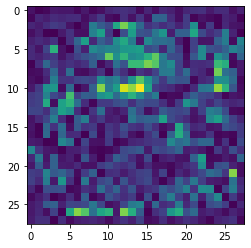

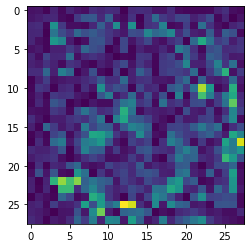

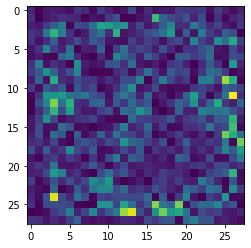

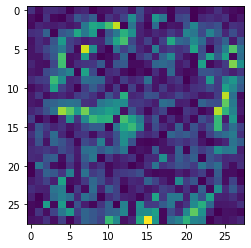

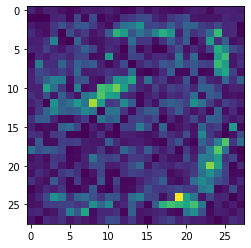

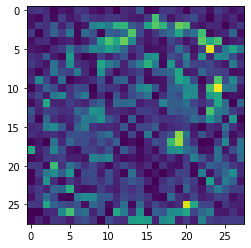

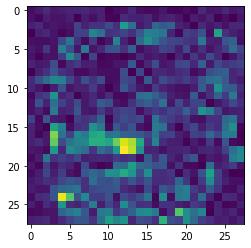

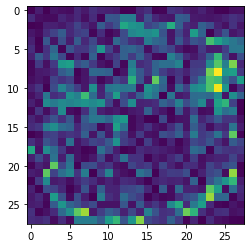

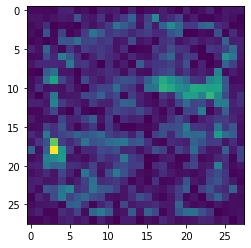

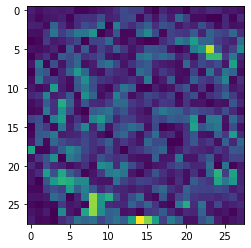

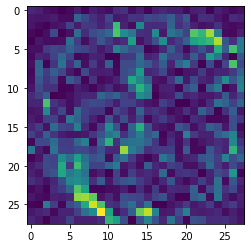

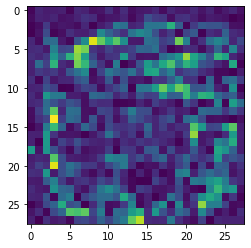

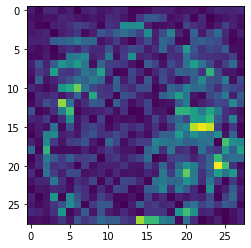

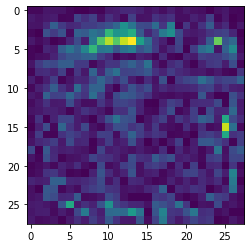

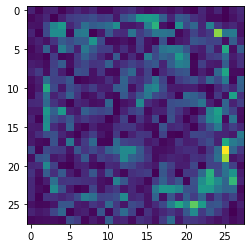

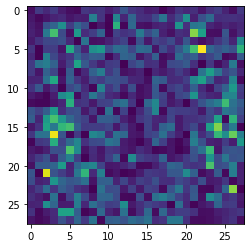

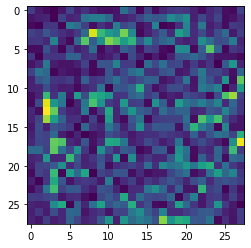

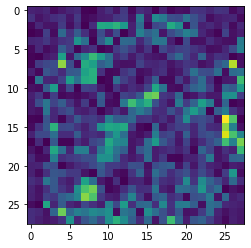

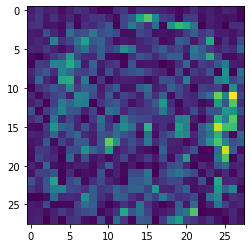

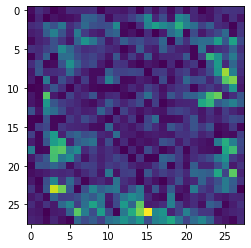

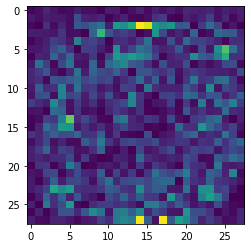

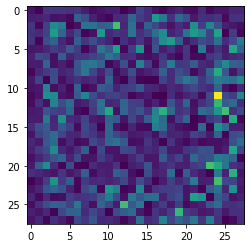

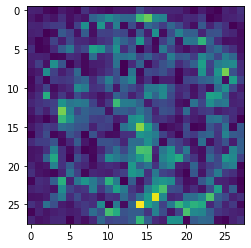

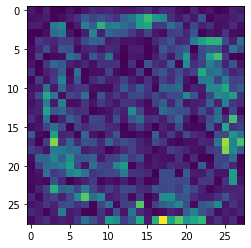

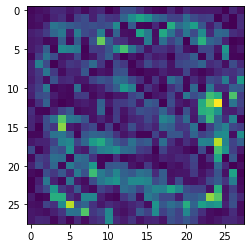

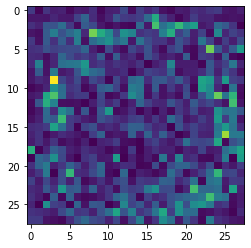

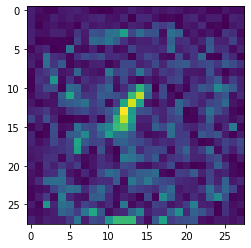

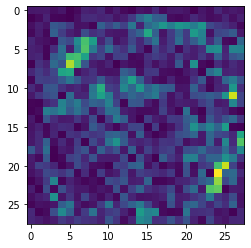

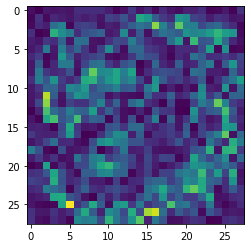

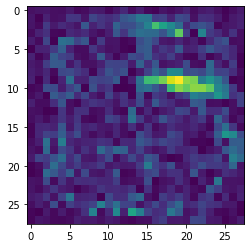

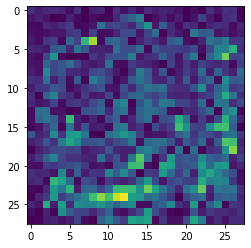

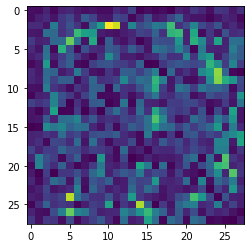

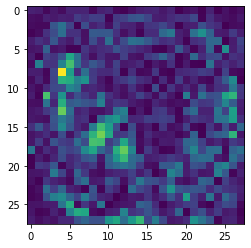

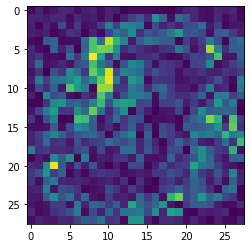

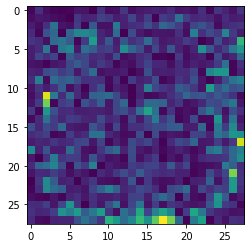

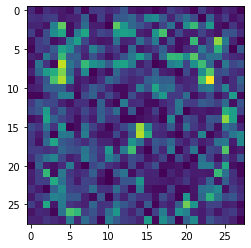

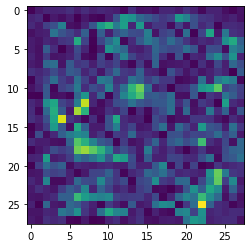

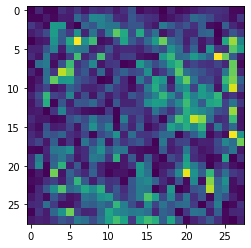

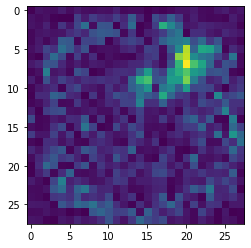

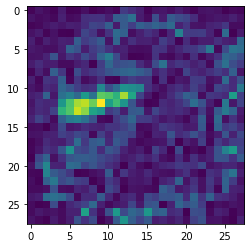

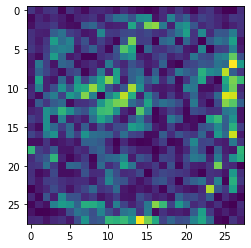

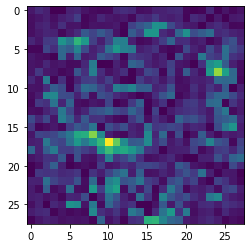

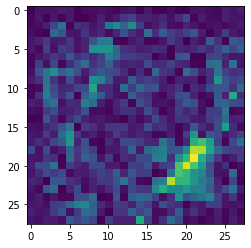

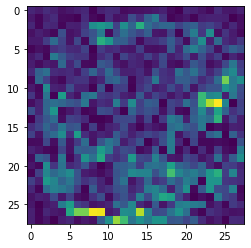

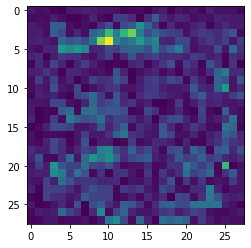

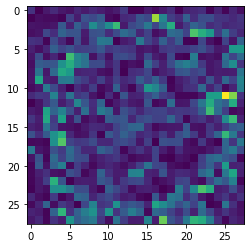

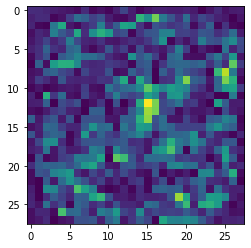

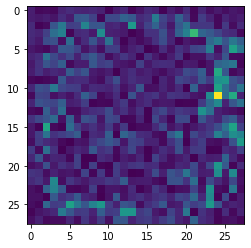

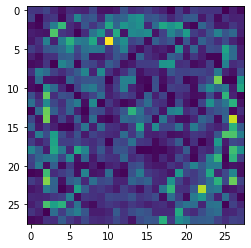

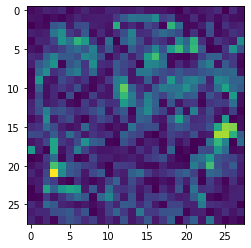

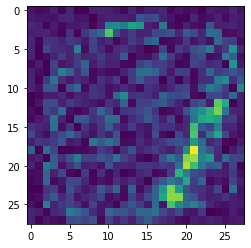

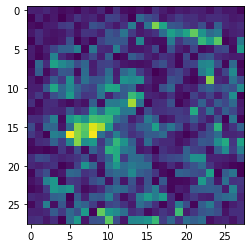

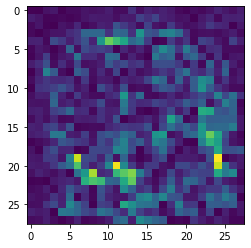

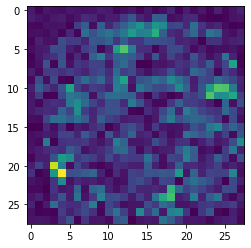

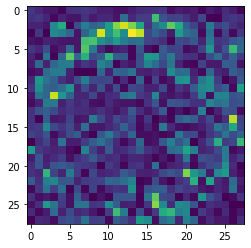

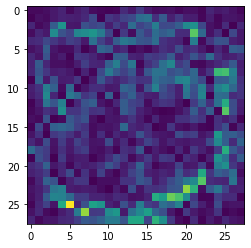

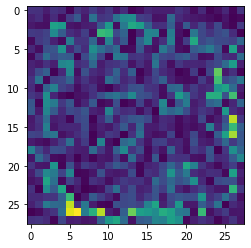

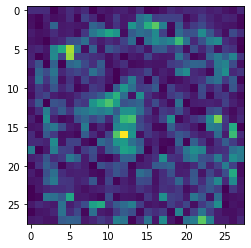

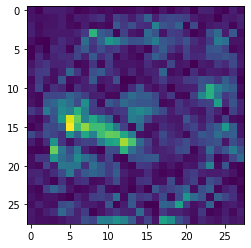

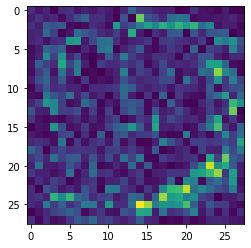

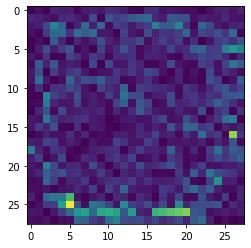

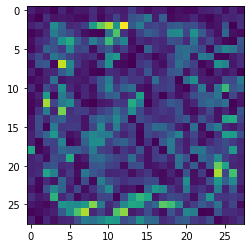

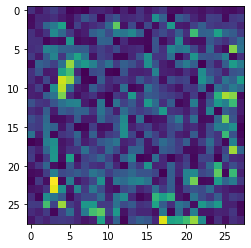

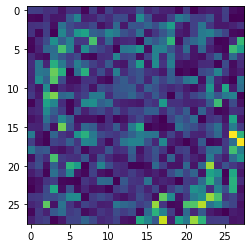

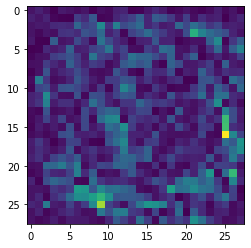

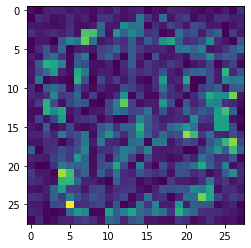

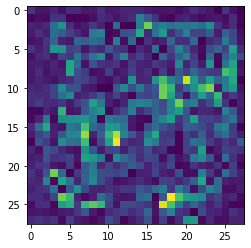

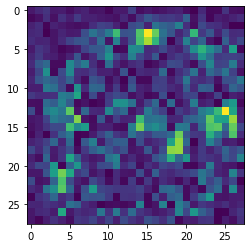

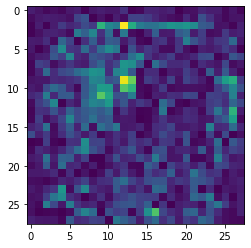

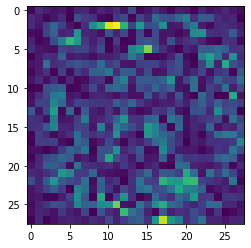

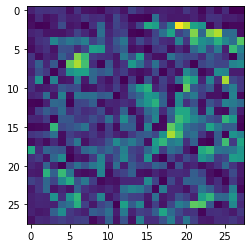

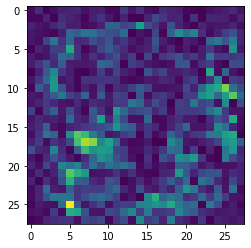

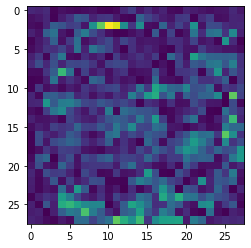

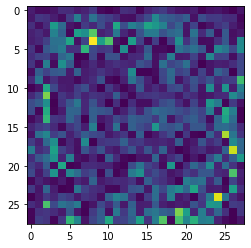

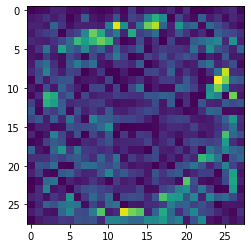

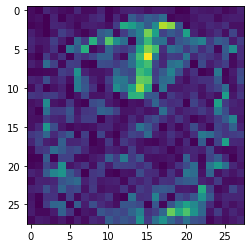

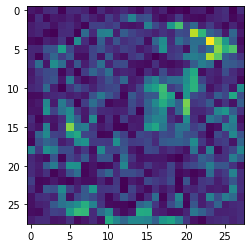

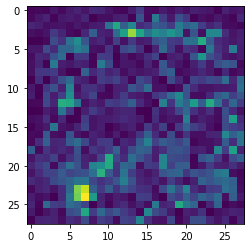

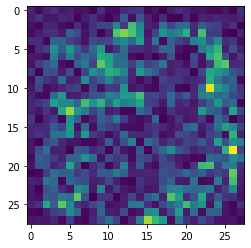

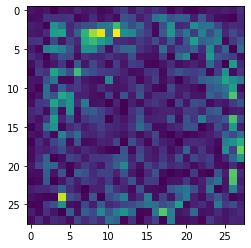

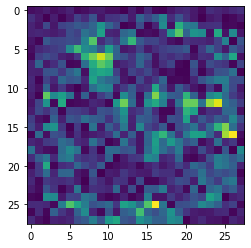

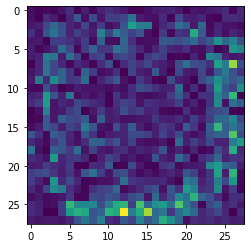

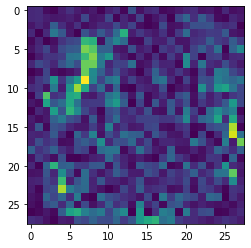

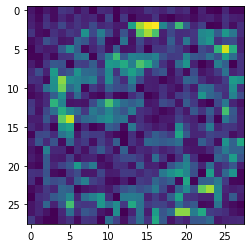

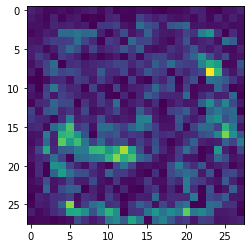

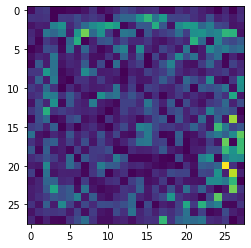

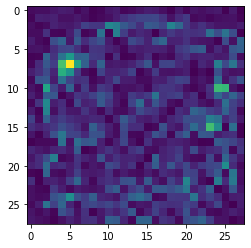

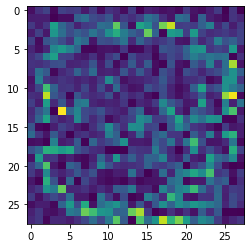

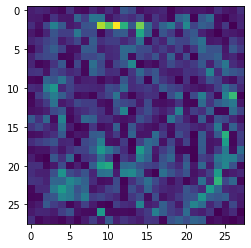

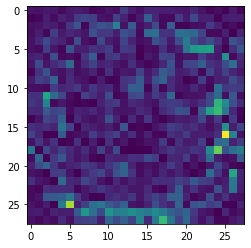

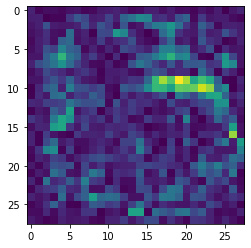

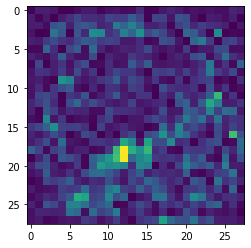

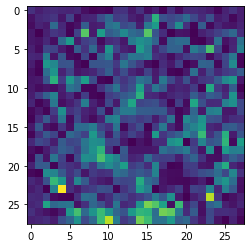

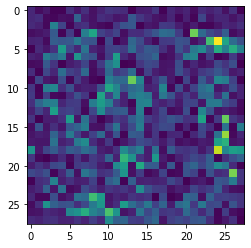

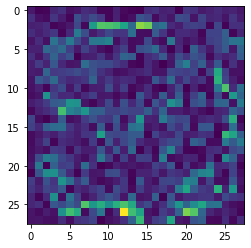

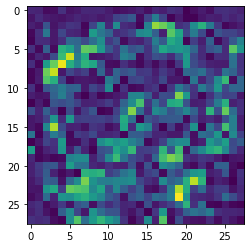

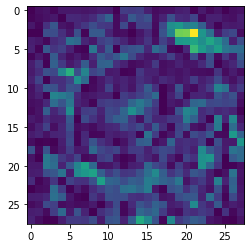

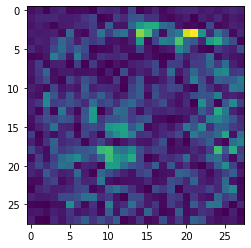

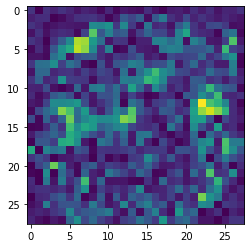

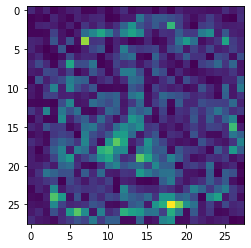

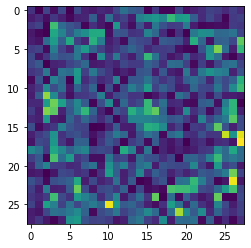

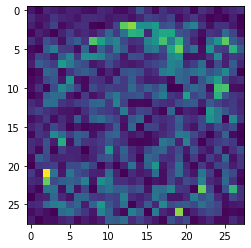

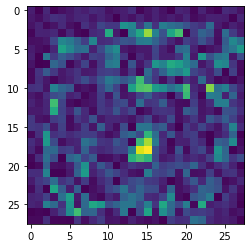

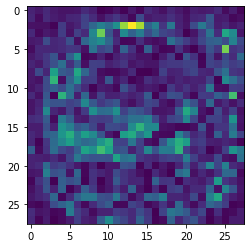

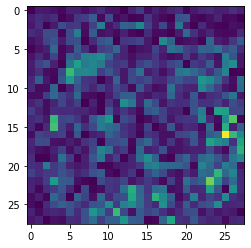

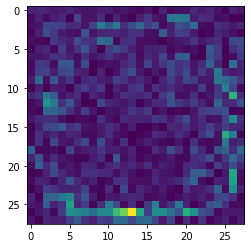

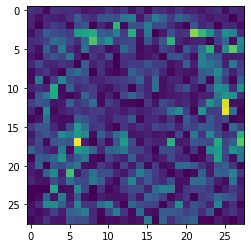

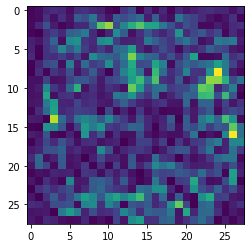

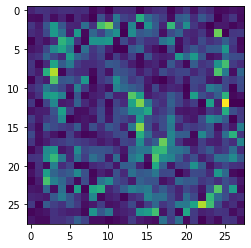

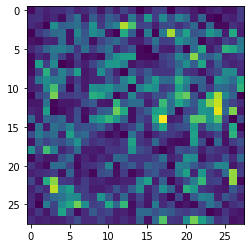

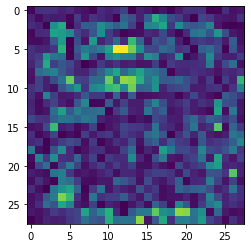

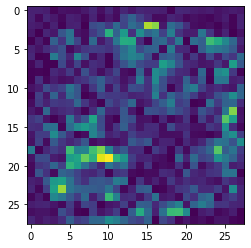

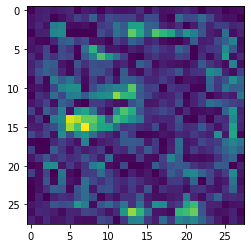

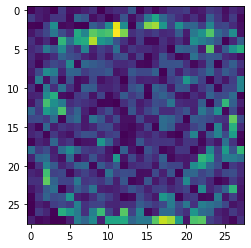

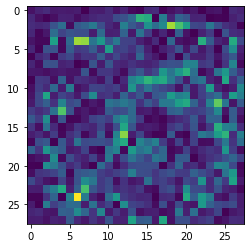

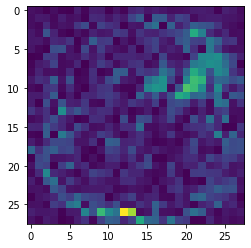

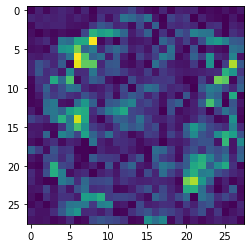

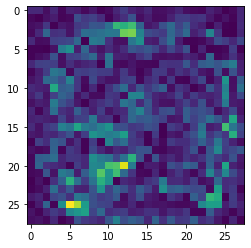

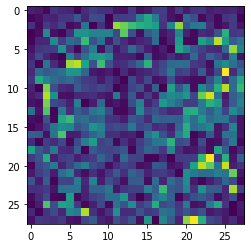

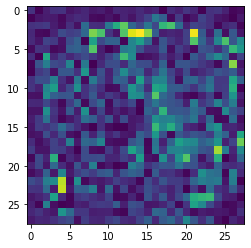

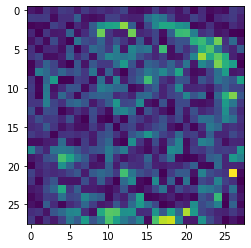

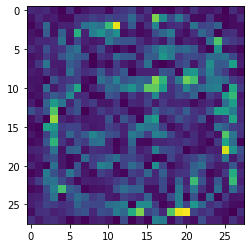

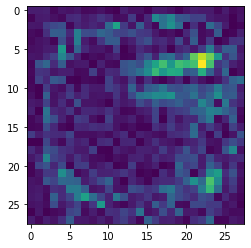

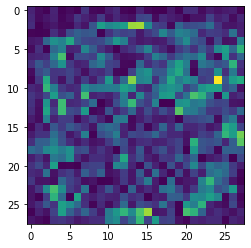

In [20]:
for k in range(128):
    weights = []
    for i in range(784):
        weights.append(w[0][i][k])
    weights = np.asarray(weights, dtype=float)

    plt.figure()
    plt.imshow(np.abs(weights).reshape((28, 28)))

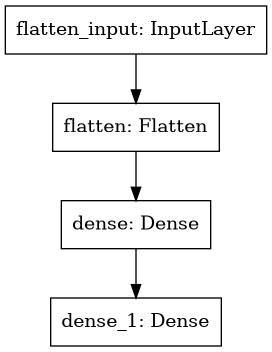

In [21]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(m,
   to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)